Morgan and Winship Chapter 10  
Mechanisms and Causal Explanation  
Pearlian Front Door Criterion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

The IV methodology does not allow analysts to disentangle direct causal effects from indirect causal effects of the causal state being estimated.  
Even if the ATE can be successfully estimated, it may not be of particular interest. The ATT, ATC or other LATEs may have greater relevance. An estimate for the ATE does not reveal the particular mechanism by which $D$ affects $Y$.

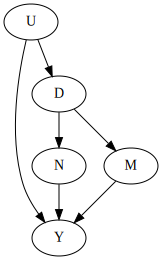

In [2]:
from causalgraphicalmodels import CausalGraphicalModel

G = CausalGraphicalModel(
    nodes=['D', 'M', 'N', 'U', 'Y'],
    edges=[
        ('D', 'M'),
        ('D', 'N'),
        ('M', 'Y'),
        ('N', 'Y'),
        ('U', 'D'),
        ('U', 'Y')
    ],
    latent_edges=[]
)

G.draw()

With $U$ unobserved, there is an unblockable backdoor path $D \leftarrow U \rightarrow Y$, and the backdoor criterion does no good for us. However, $M$ and $N$ lie along paths for the full causal effect of $D$ on $Y$, and offer an identifying mechanism for that effect.  
Consider the backdoor criterion for the effect of $D$ on $M$ and on $N$. Each has a backdoor path, with $Y$ a collider, and are blocked without conditioning. Therefore the causal effects of $D$ on $M$ and on $N$ can be estimated from their simple associations.  
For the effect of $M$ on $Y$ and of $N$ on $Y$ two backdoor paths exist. For both there is a backdoor path through $D$ and $U$ and another through $D$ and the other. All of these paths are unblocked and thus generate noncausal associations between $M$ and $Y$ and between $N$ and $Y$. We can block all four paths by conditioning on $D$, which allows consistent estimation of the causal effects.  
Combining these two types of causal effects, of $D$ on an intervening variable and of the intervening variables on $Y$, allows us to calculate the full causal effect of $D$ on $Y$.  
In the Pearlian notation this corresponds to do($D$).

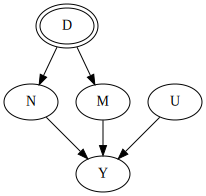

In [3]:
G_do_D = G.do('D')
G_do_D.draw()

The Front-Door Criterion is a two-step consideration of the backdoor criterion, but can be understood as:  
1. Exhaustiveness: Variables in the set $\{M\}$ intercept all directed paths from the causal variable to the outcome variable; and
2. Isolation: No unblocked backdoor paths connect the causal variable to the variables in the set $\{M\}$, and all backdoor paths from the variables in the set $\{M\}$ to the outcome can be blocked by conditioning on the causal variable.

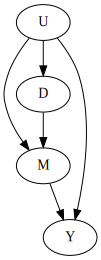

In [4]:
H = CausalGraphicalModel(
    nodes=['D', 'M', 'U', 'Y'],
    edges=[
        ('D', 'M'),
        ('M', 'Y'),
        ('U', 'D'),
        ('U', 'M'),
        ('U', 'Y')
    ],
    latent_edges=[]
)

H.draw()

$M$ does not satisfy the isolation criterion, since there is a backdoor path $D \leftarrow U \rightarrow M$ that is unblockable and a backdoor path $M \leftarrow U \rightarrow Y$ that is not blocked by $D$.  
If $U$ were observed then we could satisfy the weak isolation criterion by conditioning on it.

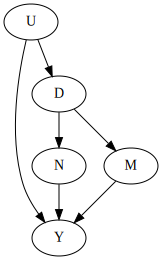

In [5]:
I = CausalGraphicalModel(
    nodes=['D', 'M', 'N', 'U', 'Y'],
    edges=[
        ('D', 'M'),
        ('M', 'Y'),
        ('U', 'D'),
        ('U', 'Y'),
        ('D', 'N'),
        ('N', 'Y')
    ],
    latent_edges=[]
)

I.draw()

If $U$ and $N$ are unobserved, then $M$ cannot satisfy the exhaustiveness criterion. There exists a direct causal path $D \rightarrow N \rightarrow Y$ that is not intercepted by $M$. Otherwise, $M$ satisfies the isolation criterion.  
If the causal pathway through $N$ were replaced by the fork $D \leftarrow N \rightarrow Y$, then $M$ would satisfy the FDC. This makes explicit the importance of properly understanding the nature of the underlying causal graph, so as to know precisely when these methods can be implemented.  
We can still identify the causal effect of $M$ on $Y$, by conditioning on $D$. This can be used to find the portion of the variation in $D$ and $Y$ that results from the path through $M$.

$D$ whether or not women have children  
$M$ number of hours per week worked in a paid job  
$N$ amount of bias in compensation practices against women with children  
$Y$ wages paid to women  
Let $N$ be unobserved, we can estimate the wage differences attributable to the reduction in work hours from having children.

In [6]:
units = 10000

e = np.random.uniform(0, 10, size=units) #Individual effects

p_d = .5 + e / 100
D = np.random.binomial(1, p_d) #Whether a woman has children

M = np.random.uniform(0, 50 - 40 * D) #Hours worked decrease with children

N = np.random.uniform(0, 10 + 40 * D) #Bias increases with children

Y = M - N + e

df = pd.DataFrame({'D': D, 'M': M, 'Y': Y})

In [7]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [8]:
df[df['D'] == 1].mean()

D     1.000000
M     5.003839
Y   -15.042342
dtype: float64

In [9]:
df[df['D'] == 0].mean()

D     0.000000
M    25.412611
Y    25.040480
dtype: float64

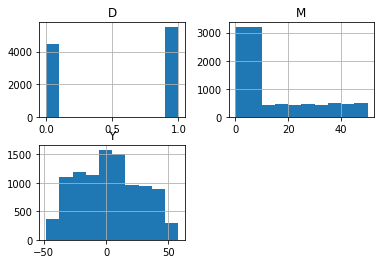

In [10]:
df.hist();

Check support, we need $P(Y, M) > 0$ and $P(M, D) > 0$.

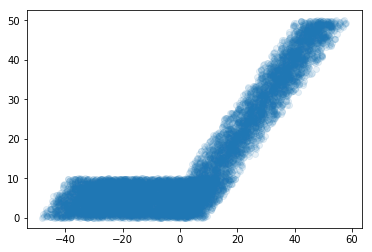

In [11]:
plt.scatter(Y, M, data=df, alpha=.1)

D
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

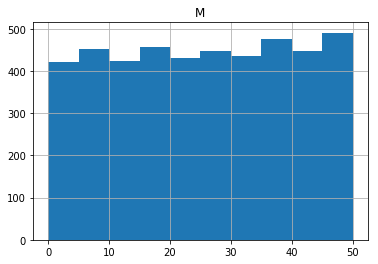

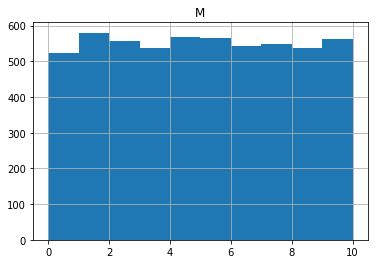

In [12]:
df.groupby('D').hist('M')

Wrong!!

In [13]:
p_m_given_d = LinearRegression()
p_m_given_d = p_m_given_d.fit(df[['D']], df['M'])
df['$P(D|M)$'] = p_m_given_d.predict(df[['D']])
df.head()

,D,M,Y,$P(D|M)$
0,1,7.105888,-29.435328,5.003839
1,1,9.500608,-25.034589,5.003839
2,0,29.950512,28.164065,25.412611
3,0,25.498104,18.606618,25.412611
4,0,38.198131,42.621277,25.412611


**Note** Write in the potential outcomes framework

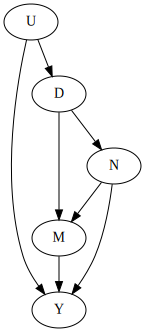

In [14]:
J = CausalGraphicalModel(
    nodes=['D', 'M', 'N', 'U', 'Y'],
    edges=[
        ('D', 'M'),
        ('M', 'Y'),
        ('U', 'D'),
        ('U', 'Y'),
        ('D', 'N'),
        ('N', 'Y'),
        ('N', 'M')
    ],
    latent_edges=[]
)

J.draw()

In $J$, there is a direct effect from one of the variables on an unobserved causal pathway $N$ on a variable on the observed causal pathway $M$. The backdoor path $M \leftarrow N \rightarrow Y$ is not intercepted by $D$, or any observed variable. Therefore, we are not able to isolate the causal effect of $M$ on $Y$ and so cannot reconstruct the causal pathway $D \rightarrow M \rightarrow Y$.  
The exhaustiveness assumption can be relaxed in return for estimating only part of the causal effect. But in order to estimate this partial effect we need isolation of the mechanism in a well-specified model, which may be difficult when parts remain unobserved.

Previous example, but now we let unobserved bias $N$ affect work hours $M$.

**Note** Return to 10.3 The Appeal for Generative Mechanisms ...